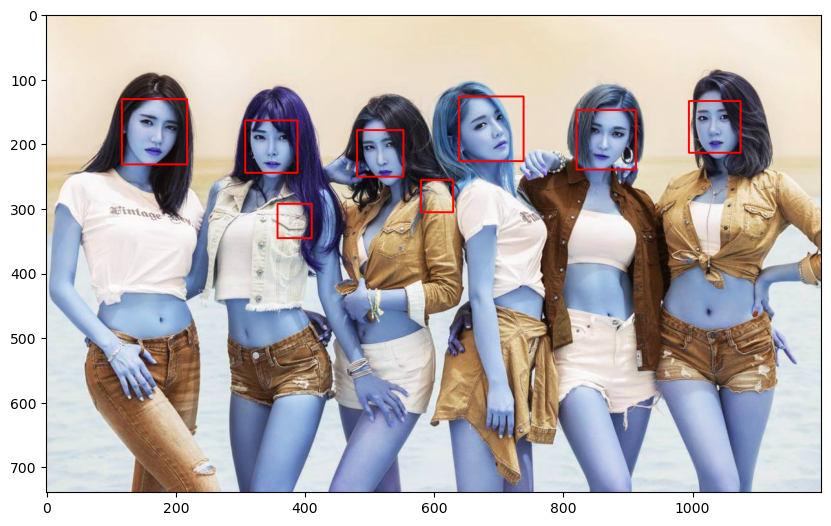

In [3]:
import cv2
import matplotlib.pyplot as plt
# Load the pre-trained HaarCascade classifier for face detection
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Read the input image
image = cv2.imread('ppl-01.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(10, 10))

# Draw rectangles around the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display the output  
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()
# cv2.imshow('Faces', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [2]:
pip install deepface

Note: you may need to restart the kernel to use updated packages.


In [7]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

# Load the pre-trained HaarCascade classifier for face detection
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Initialize the video capture object
cap = cv2.VideoCapture(0)  # Use 0 for default webcam, or use the device index for other cameras

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if not ret:
        break
    
    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    # Convert the frame from BGR to RGB for displaying with matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Process each detected face for emotion detection
    for (x, y, w, h) in faces:
        face = frame[y:y+h, x:x+w]  # Extract the face region
        emotion_analysis = DeepFace.analyze(face, actions=['emotion'], enforce_detection=False)
        
        # If enforce_detection=False is used, DeepFace.analyze returns a list
        if isinstance(emotion_analysis, list):
            emotion_analysis = emotion_analysis[0]
        
        emotion = emotion_analysis['dominant_emotion']
        
        # Draw a rectangle around the face
        cv2.rectangle(frame_rgb, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
        # Put the emotion label above the rectangle
        cv2.putText(frame_rgb, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    
    # Display the frame with detected faces and emotions
    cv2.imshow('Face Emotion Detection', frame_rgb)
    
    # Exit loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()